In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('C:\\Users\\frank\\OneDrive\\Desktop\\Kaggle\\data\\ARIMA.txt')

df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [3]:
df['date'] = pd.to_datetime(df['date'])

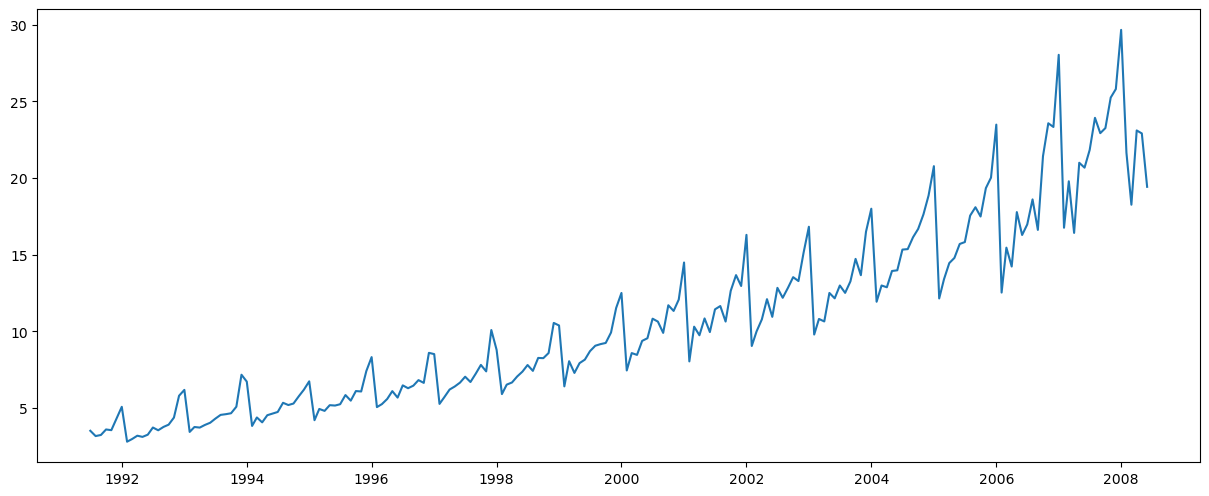

In [4]:
plt.figure(figsize=(15,6), dpi=100)
plt.plot(df['date'], df['value'])

# Feature Scaling

In [5]:
scaler = MinMaxScaler()

In [6]:
# Reshape the passenters data to 2D array for transformation

df['value_s'] = scaler.fit_transform(df['value'].values.reshape(-1, 1))

In [7]:
df.head()

,date,value,value_s
0,1991-07-01,3.526591,0.026520
1,1991-08-01,3.180891,0.013645
2,1991-09-01,3.252221,0.016301
3,1991-10-01,3.611003,0.029663
4,1991-11-01,3.565869,0.027982


In [309]:
look_back = 1

split = int(0.7*df.shape[0])
train = df.loc[ : split , :]
test = df.loc[split - look_back:, :]

In [310]:
test.shape

(63, 3)

In [311]:
def get_data(data, look_back):
    dataX, dataY = [], []
    for i in range(len(data)-look_back-1):
        a = data[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(data[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [312]:

X_train, y_train = get_data(train['value_s'].values.reshape(-1, 1), look_back)
X_test, y_test = get_data(test['value_s'].values.reshape(-1, 1), look_back)

In [313]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [314]:
X_train.shape

(141, 1, 1)

In [315]:
y_train.shape

(141,)

In [316]:
X_test.shape

(61, 1, 1)

In [317]:
y_test.shape

(61,)

# Build the LSTM

In [318]:
model = Sequential()
model.add(LSTM(50, input_shape = (look_back, 1)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [319]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_23 (LSTM)               (None, 50)                10400     
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [320]:
model.fit(X_train, y_train, epochs=200, batch_size=1)

Epoch 1/200
141/141 [==============================] - 2s 764us/step - loss: 0.0141
Epoch 2/200
141/141 [==============================] - 0s 914us/step - loss: 0.0081
Epoch 3/200
141/141 [==============================] - 0s 736us/step - loss: 0.0060
Epoch 4/200
141/141 [==============================] - 0s 743us/step - loss: 0.0049
Epoch 5/200
141/141 [==============================] - 0s 743us/step - loss: 0.0041
Epoch 6/200
141/141 [==============================] - 0s 730us/step - loss: 0.0038
Epoch 7/200
141/141 [==============================] - 0s 738us/step - loss: 0.0035
Epoch 8/200
141/141 [==============================] - 0s 748us/step - loss: 0.0035
Epoch 9/200
141/141 [==============================] - 0s 740us/step - loss: 0.0035
Epoch 10/200
141/141 [==============================] - 0s 729us/step - loss: 0.0035
Epoch 11/200
141/141 [==============================] - 0s 750us/step - loss: 0.0035
Epoch 12/200
141/141 [==============================] - 0s 736us/step - lo

In [321]:
y_pred = model.predict(X_test)

In [322]:
y_pred.shape

(61, 1)

In [323]:
scaler.scale_

array([0.03724279])

In [324]:
y_pred = scaler.inverse_transform(y_pred)

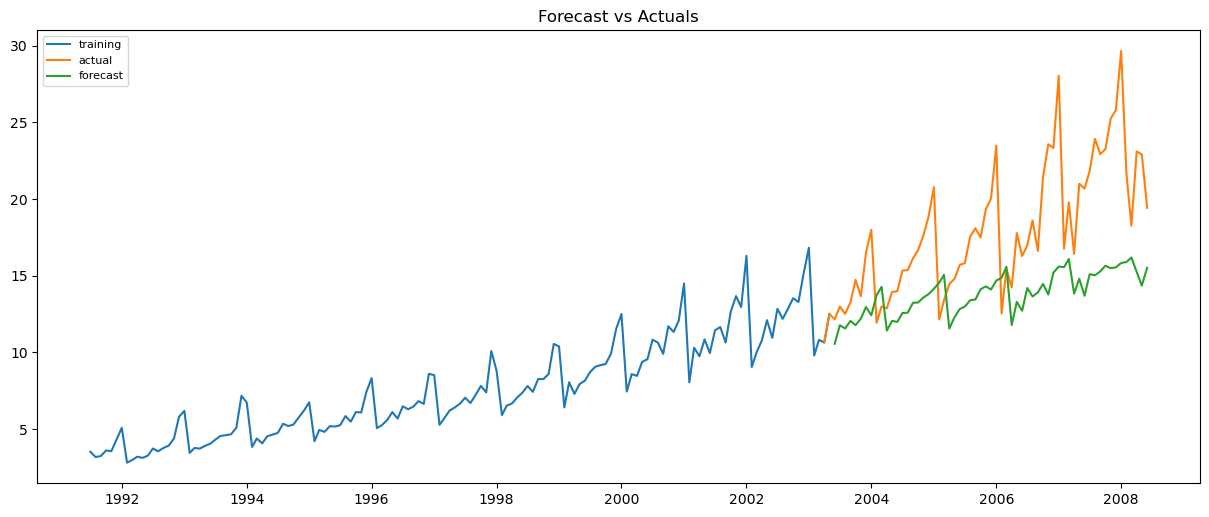

In [325]:
plt.figure(figsize=(15,6), dpi=100)

plt.plot(train['date'], train['value'], label='training')
plt.plot(test['date'], test['value'], label='actual')

plt.plot(test['date'][look_back+1: ], y_pred[:, 0], label='forecast')

plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()